# Test Results from NetLogo Simulation

## Main Changes
- Changed base-infection-risk from 0.006 to 0.06
- Added Home Patch

# Table of Contents
* [File Prepping](#file-prepping)
* [Models](#models)
* [Contact Tracing](#ct)
* [Daily Chart](#dc)
* [Daily Deaths](#dd)
* [Daily Total Cases](#dtc)
* [Daily Total Recoveries](#dtc)
* [Spread of Disease](#sod)
* [Total Vaccinations](#tv)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  

#For Extracting the model from csv
rows_to_keep = [5,6]
pd.set_option('display.max_columns', None)

# File Prepping <a class="anchor" id="file-prepping"></a>

## Test-6

In [2]:
test6_model = pd.read_csv('Test-6\Test 6 - Galvez\Test 6 Galvez - Spread of Disease.csv', skiprows = lambda x: x not in rows_to_keep)

ct_G6 = pd.read_csv('Test-6\Test 6 - Galvez\Test 6 Galvez - Contact Tracing.csv', skiprows = 21, usecols=[0,1,5,9,13,17,21])
dc_G6 = pd.read_csv('Test-6\Test 6 - Galvez\Test 6 Galvez - Daily Chart.csv', skiprows = 19, usecols=[0,1,5,9,13])
dd_G6 = pd.read_csv('Test-6\Test 6 - Galvez\Test 6 Galvez - Daily Deaths.csv', skiprows = 18, usecols=[0,1,5,9])
dtc_G6 = pd.read_csv('Test-6\Test 6 - Galvez\Test 6 Galvez - Daily total cases.csv', skiprows = 16, usecols=[0,1])
dtr_G6 = pd.read_csv('Test-6\Test 6 - Galvez\Test 6 Galvez - Daily total recoveries.csv', skiprows = 16, usecols=[0,1])
sod_G6 = pd.read_csv('Test-6\Test 6 - Galvez\Test 6 Galvez - Spread of Disease.csv', skiprows = 19, usecols=[0,1,5,9,13])
tv_G6 = pd.read_csv('Test-6\Test 6 - Galvez\Test 6 Galvez - Total Vaccinations.csv', skiprows = 16, usecols=[0,1])

ct_G6.columns = ['ticks', 'workplace', 'grocery', 'commute', 'hospital', 'leisure', 'home']
dc_G6.columns = ['days', 'active_cases', 'recoveries', 'deaths', 'exposed']
dd_G6.columns = ['days', 'total', 'senior', 'comorbid']
dtc_G6.columns = ['days', 'cases']
dtr_G6.columns = ['days', 'recoveries']
sod_G6.columns = ['days', 'asym', 'moderate', 'severe', 'mild']
tv_G6.columns = ['days', 'vax']

## Test-7

In [3]:
test_model = pd.read_csv('Test-7\Test 7 - Galvez\Test 7 Galvez - Spread of Disease.csv', skiprows = lambda x: x not in rows_to_keep)

ct = pd.read_csv('Test-7\Test 7 - Galvez\Test 7 Galvez - Contact Tracing.csv', skiprows = 21, usecols=[0,1,5,9,13,17,21])
dc = pd.read_csv('Test-7\Test 7 - Galvez\Test 7 Galvez - Daily Chart.csv', skiprows = 19, usecols=[0,1,5,9,13])
dd = pd.read_csv('Test-7\Test 7 - Galvez\Test 7 Galvez - Daily Deaths.csv', skiprows = 18, usecols=[0,1,5,9])
dtc = pd.read_csv('Test-7\Test 7 - Galvez\Test 7 Galvez - Daily total cases.csv', skiprows = 16, usecols=[0,1])
dtr = pd.read_csv('Test-7\Test 7 - Galvez\Test 7 Galvez - Daily total recoveries.csv', skiprows = 16, usecols=[0,1])
sod = pd.read_csv('Test-7\Test 7 - Galvez\Test 7 Galvez - Spread of Disease.csv', skiprows = 19, usecols=[0,1,5,9,13])
tv = pd.read_csv('Test-7\Test 7 - Galvez\Test 7 Galvez - Total Vaccinations.csv', skiprows = 16, usecols=[0,1])

ct.columns = ['ticks', 'workplace', 'grocery', 'commute', 'hospital', 'leisure', 'home']
dc.columns = ['days', 'active_cases', 'recoveries', 'deaths', 'exposed']
dd.columns = ['days', 'total', 'senior', 'comorbid']
dtc.columns = ['days', 'cases']
dtr.columns = ['days', 'recoveries']
sod.columns = ['days', 'asym', 'moderate', 'severe', 'mild']
tv.columns = ['days', 'vax']

tick_represents = 10
ticks_to_days = int(1440/tick_represents)


# Models <a class="anchor" id="models"></a>

In [5]:
test_model

,covid-variant,commute-area,mask-wear-faceshield-percent,healthcare-area,leisure-area,essential-worker-count,vax-type,total-population,grocery-area,comorbidity-count,vax-per-day,pandemic-time,maximum-days,curfew-hours,workplace-area,tick-represents,starting-vax-percent,healthcare-worker-count,alert-level,starting-infected,mask-wear-percent,senior-count
0,"""Delta""",1500,80,750,2250,365,"""Average""",1663,1500,67,1,3,0,8,2250,"""10 Minutes""",50,183,"""Level 4 & 5""",17,90,67


In [6]:
print(ticks_to_days)

144


# Contact Tracing <a class="anchor" id="ct"></a>

In [7]:
#Ticks to Days
ct_days = ct.iloc[0::ticks_to_days, :]

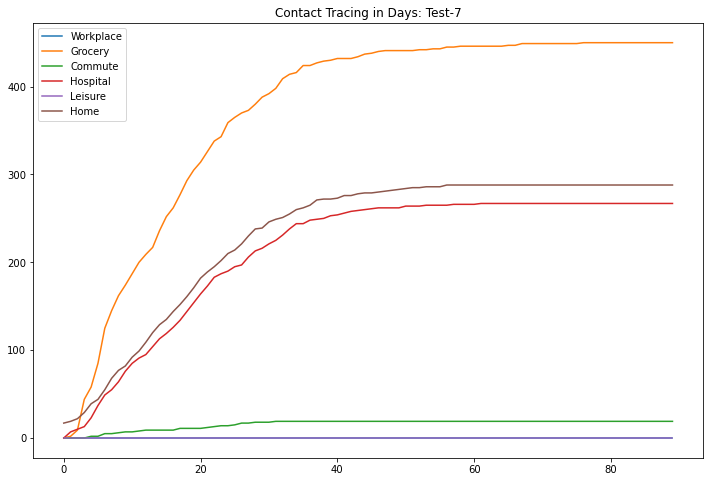

In [8]:
plt.figure(figsize=(12,8))
plt.plot(ct_days.ticks, ct_days.workplace)
plt.plot(ct_days.ticks, ct_days.grocery)
plt.plot(ct_days.ticks, ct_days.commute)
plt.plot(ct_days.ticks, ct_days.hospital)
plt.plot(ct_days.ticks, ct_days.leisure)
plt.plot(ct_days.ticks, ct_days.home)
plt.legend(['Workplace', 'Grocery', 'Commute', 'Hospital', 'Leisure', 'Home'])
plt.title('Contact Tracing in Days: Test-7')
plt.show()

# Daily Chart <a class="anchor" id="dc"></a>

In [9]:
dc_days = dc.iloc[0::ticks_to_days, :]

In [10]:
dc_days.head()

,days,active_cases,recoveries,deaths,exposed
0,0,17,0,0,0
144,1,28,0,0,9
288,2,41,0,0,3
432,3,86,0,0,17
576,4,121,1,0,30


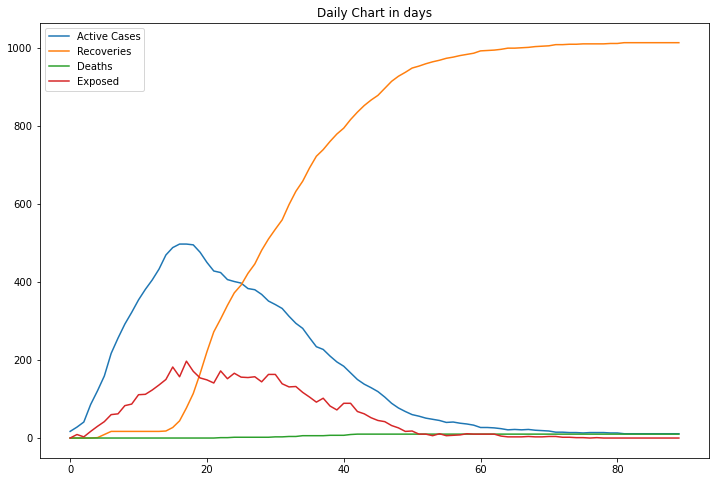

In [11]:
plt.figure(figsize=(12,8))
plt.plot(dc_days.days, dc_days.active_cases)
plt.plot(dc_days.days, dc_days.recoveries)
plt.plot(dc_days.days, dc_days.deaths)
plt.plot(dc_days.days, dc_days.exposed)
plt.title('Daily Chart in days')
plt.legend(['Active Cases', 'Recoveries', 'Deaths', 'Exposed'])
plt.show()

# Daily Deaths <a class="anchor" id="dd"></a>

In [12]:
dd_days = dd.iloc[1::ticks_to_days, :]

In [13]:
dd_days.head()

,days,total,senior,comorbid
1,1,0,0,0
145,2,0,0,0
289,3,0,0,0
433,4,0,0,0
577,5,0,0,0


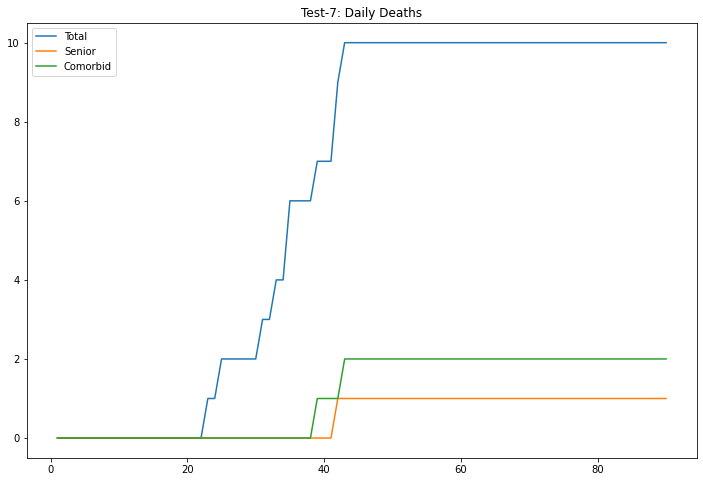

In [14]:
plt.figure(figsize=(12,8))
plt.plot(dd_days.days, dd_days.total)
plt.plot(dd_days.days, dd_days.senior)
plt.plot(dd_days.days, dd_days.comorbid)
plt.title('Test-7: Daily Deaths')
plt.legend(['Total', 'Senior', 'Comorbid'])
plt.show()

# Daily Total Cases <a class="anchor" id="dtc"></a>

In [15]:
dtc_days = dtc.iloc[1::ticks_to_days, :]

In [16]:
dtc_days.tail()

,days,cases
12241,86,1024
12385,87,1024
12529,88,1024
12673,89,1024
12817,90,1024


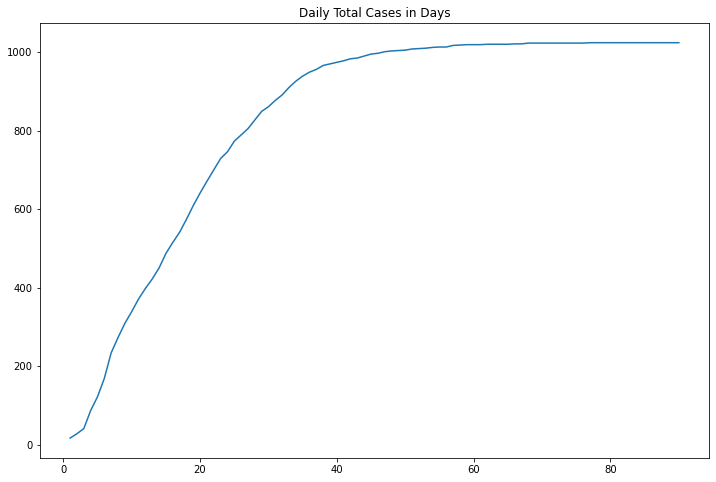

In [17]:
plt.figure(figsize=(12,8))
plt.plot(dtc_days.days, dtc_days.cases)
plt.title('Daily Total Cases in Days')
plt.show()

# Daily Total Recoveries <a class="anchor" id="dtr"></a>

In [18]:
dtr_days = dtr.iloc[1::ticks_to_days, :]

In [21]:
dtr_days.head()

,days,recoveries
1,1,0
145,2,0
289,3,0
433,4,0
577,5,1


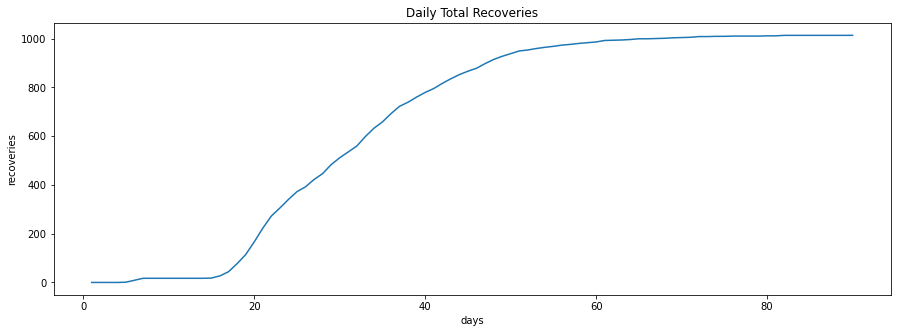

In [22]:
plt.figure(figsize=(15,5))
plt.plot(dtr_days.days, dtr_days.recoveries)
plt.title('Daily Total Recoveries')
plt.xlabel('days')
plt.ylabel('recoveries')
plt.show()

# Spread of Disease <a class="anchor" id="sod"></a>

In [23]:
#Conversion of Ticks to Days
sod_days = sod.iloc[1::ticks_to_days, :]

In [31]:
sod_days.head()

,days,asym,moderate,severe,mild
1,1,0,17,0,0
145,2,1,21,3,3
289,3,2,27,6,6
433,4,3,42,21,21
577,5,4,56,33,28


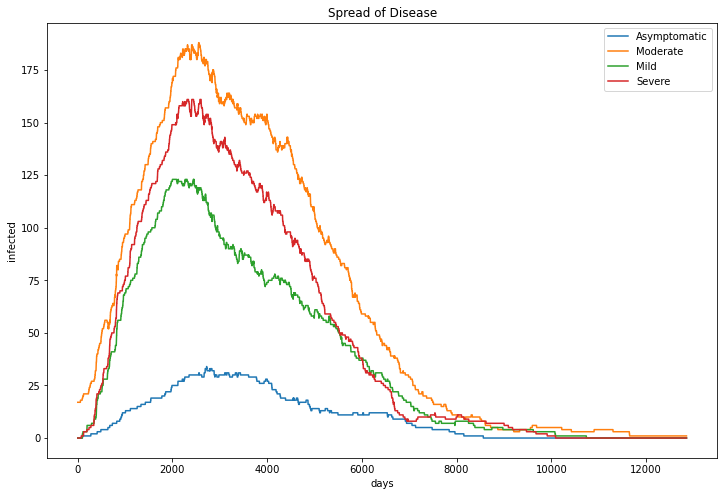

In [25]:
plt.figure(figsize=(12,8))
plt.plot(sod.asym)
plt.plot(sod.moderate)
plt.plot(sod.mild)
plt.plot(sod.severe)
plt.title('Spread of Disease')
plt.legend(['Asymptomatic', 'Moderate', 'Mild', 'Severe'])
plt.xlabel('days')
plt.ylabel('infected')
plt.show()

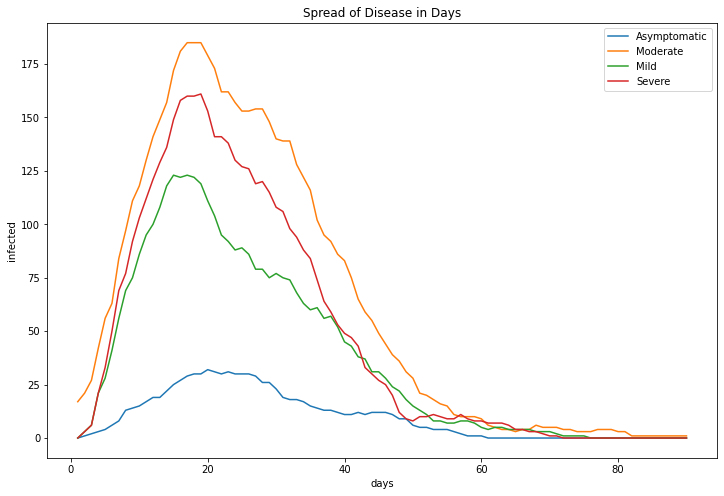

In [26]:
plt.figure(figsize=(12,8))
plt.plot(sod_days.days, sod_days.asym)
plt.plot(sod_days.days, sod_days.moderate)
plt.plot(sod_days.days, sod_days.mild)
plt.plot(sod_days.days, sod_days.severe)
plt.title('Spread of Disease in Days')
plt.legend(['Asymptomatic', 'Moderate', 'Mild', 'Severe'])
plt.xlabel('days')
plt.ylabel('infected')
plt.show()

# Total Vaccinations <a class="anchor" id="tv"></a>

In [27]:
#Ticks to Days
tv_days = tv.iloc[1::ticks_to_days, :]

In [28]:
tv_days.head()

,days,vax
1,0,831
145,1,831
289,2,831
433,3,831
577,4,831


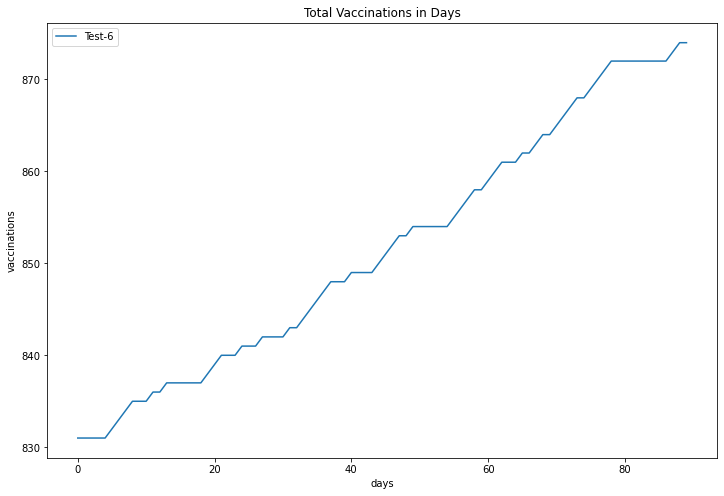

In [30]:
plt.figure(figsize=(12,8))
plt.plot(tv_days.days, tv_days.vax)
plt.title('Total Vaccinations in Days')
plt.legend(['Test-6'])
plt.xlabel('days')
plt.ylabel('vaccinations')
plt.show()